# Project Introduction
## Group Members:
Adrian Guin Rizzo, Nigel Balkaran, Brian St. Pierre, Yiwen Rachel

## Objective
The final project aims to predict whether patients have diabetes or not based on certain diagnostic measurements. The grading criteria encompass two aspects: 
- Small-scale program: Assessing the functionality and organization of the program.
- Analysis of publicly available data: Evaluating data handling, exploratory data analysis, and visualization techniques applied to the dataset.

### Small-scale Program
Grading criteria for the program include:
- Functionality: Assessing whether the program meets the proposed requirements.
- Code Quality: Evaluating cleanliness, organization, use of functions, function docstrings, comments, and modular structure.

### Dataset Overview
The dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. It focuses on diagnosing diabetes based on specific medical measurements. Constraints were placed on the patient selection, including females at least 21 years old of Pima Indian heritage.

## Dataset Details
**Context**: The dataset's objective is diagnostic prediction for diabetes using certain measurements. 

**Content**: It contains medical predictor variables (e.g., pregnancies, BMI, insulin level, age) and the target variable 'Outcome'.

**Acknowledgements**: Smith et al. (1988) - Proceedings of the Symposium on Computer Applications and Medical Care.

**Inspiration**: Building a machine learning model to accurately predict diabetes in patients.

## Analysis Scope
- Importing Python packages
- Reading and loading the dataset
- Data manipulation and exploratory data analysis (EDA)
- Handling missing values, duplicates, standardization, normalization
- Descriptive statistics, correlation check if necessary
- Univariate and bivariate analysis

## Reference
Link: https://pubmed.ncbi.nlm.nih.gov/8422798/

Blood Pressure: https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982

Age: https://pubmed.ncbi.nlm.nih.gov/7203662/#:~:text=The%20stages%20of%20adulthood%20examined,(ages%2065%20and%20older)

Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data (It was changed)

BMI: https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

Table: https://www.hindawi.com/journals/jhe/2021/9930985/tab3/


In [1]:
#Import all of the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


In [2]:
my_df = pd.read_csv("diabetes_dataset1.csv")
my_df

,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,smoking_history,Outcome
0,6,148,72,35,0,33.6,0.627,50,never,1
1,1,85,66,29,0,26.6,0.351,31,No Info,0
2,8,183,64,0,0,23.3,0.672,32,never,1
3,1,89,66,23,94,28.1,0.167,21,current,0
4,0,137,40,35,168,43.1,2.288,33,current,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,former,0
764,2,122,70,27,0,36.8,0.340,27,never,0
765,5,121,72,23,112,26.2,0.245,30,ever,0
766,1,126,60,0,0,30.1,0.349,47,never,1


In [3]:
nRow, nCol = my_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 768 rows and 10 columns


In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   BloodGlucoseLevel         768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   smoking_history           768 non-null    object 
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [5]:
my_df.describe()

,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.833333,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.363790,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.833333,3.363790,0.000,1.00000,3.0000,6.00000,17.00
BloodGlucoseLevel,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Handling the missing values

This function helps clean specific columns in a DataFrame by changing any zero values to NaN, which might be useful for data analysis or modeling purposes, especially when 0 indicates missing or undefined data.

In [7]:
def replace_zero_with_nan(dataframe, columns):
    """
    Changes all zero values in certain columns to NaN.

    Parameters:
    - dataframe: Pandas DataFrame, the dataset to be processed.
    - columns: List, the column names where you want to make the zero values NaN.
    """
    # Replace 0 with NaN in specified columns
    dataframe.loc[:, columns] = dataframe[columns].replace(0, np.nan)

# Call/Apply the function to selected columns
replace_zero_with_nan(my_df, columns=['BloodGlucoseLevel', 'BloodPressure', 'SkinThickness', 'Insulin',
                                   'BMI', 'DiabetesPedigreeFunction', 'Age'])


This code identifies columns with missing values and then uses a specified categorical column (such as 'Age_Group') to fill those missing values in those identified columns using a chosen metric (like median or mean).

In [8]:
# Identify columns with missing values
missing_ones = my_df.isnull().sum()[my_df.isnull().sum() > 0].index

def fill_based_category(data, columns, based_cat, metric):
    """
    Fills missing values in specified columns based on a categorical feature and a metric.
    
    Parameters:
    - data: Pandas DataFrame, the dataset.
    - columns: List, columns with missing values.
    - based_cat: String, categorical column name for grouping.
    - metric: String, the metric to fill missing values (e.g., 'median', 'mean').
    """
    # Make a copy of the DataFrame
    data = data.copy()
    
    # Fill missing values in specified columns based on the categorical feature and chosen metric
    for col in columns:
        data[col] = data[col].fillna(my_df.groupby(based_cat)[col].transform(metric))
    
    return data

# Fill missing values in DataFrame based on 'Age_Group' and using the median metric
my_df = fill_based_category(my_df, missing_ones, based_cat="Age", metric="median")

In [9]:
# Check for missing values in the 'BloodGlucoseLevel' column
all(my_df['BloodGlucoseLevel'].isna())
#all(df['BloodGlucoseLevel'] == 'NaN')

False

In [1]:
# This code checks for missing values specifically in the 'BloodGlucoseLevel' column of the DataFrame 'my_df'.
# The expression 'my_df['BloodGlucoseLevel'].isna()' returns a boolean Series indicating True for missing (NaN) values and False for non-missing values.

In [10]:
my_df.head(25)

,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,smoking_history,Outcome
0,6,148.0,72.0,35.0,105.5,33.6,0.627,50,never,1
1,1,85.0,66.0,29.0,183.5,26.6,0.351,31,No Info,0
2,8,183.0,64.0,28.5,93.5,23.3,0.672,32,never,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,current,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,current,1
5,5,116.0,74.0,29.0,145.5,25.6,0.201,30,never,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,never,1
7,1,115.0,75.0,35.5,192.5,35.3,0.134,29,No Info,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,never,1
9,8,125.0,96.0,26.5,183.0,35.2,0.232,54,never,1


# Creation of new features

In [11]:
# Age Group
my_df['Age_Group'] = pd.cut(my_df['Age'], bins=[20, 34, 44 , 59, float('inf')],
                         labels=['Young Adults','Early Middle-Aged', 'Late Middle-Aged', 'Seniors'])

# Blood Pressure Category
my_df['BloodPressure_Category'] = pd.cut(my_df['BloodPressure'], bins=[-1, 80, 90, float('inf')],
                                      labels=['Normal', 'Elevated', 'Hypertensive'])

# BMI Category
my_df['BMI_Category'] = pd.cut(my_df['BMI'], bins=[-1, 18.5, 24.9, 29.9, float('inf')],
                            labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

my_df.head(50)

,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,smoking_history,Outcome,Age_Group,BloodPressure_Category,BMI_Category
0,6,148.0,72.0,35.0,105.5,33.6,0.627,50,never,1,Late Middle-Aged,Normal,Obese
1,1,85.0,66.0,29.0,183.5,26.6,0.351,31,No Info,0,Young Adults,Normal,Overweight
2,8,183.0,64.0,28.5,93.5,23.3,0.672,32,never,1,Young Adults,Normal,Normal Weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,current,0,Young Adults,Normal,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,current,1,Young Adults,Normal,Obese
5,5,116.0,74.0,29.0,145.5,25.6,0.201,30,never,0,Young Adults,Normal,Overweight
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,never,1,Young Adults,Normal,Obese
7,1,115.0,75.0,35.5,192.5,35.3,0.134,29,No Info,0,Young Adults,Normal,Obese
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,never,1,Late Middle-Aged,Normal,Obese
9,8,125.0,96.0,26.5,183.0,35.2,0.232,54,never,1,Late Middle-Aged,Hypertensive,Obese


# Always make a copy

In [12]:
copied_df1 = my_df.copy()

# Checking the Correlation


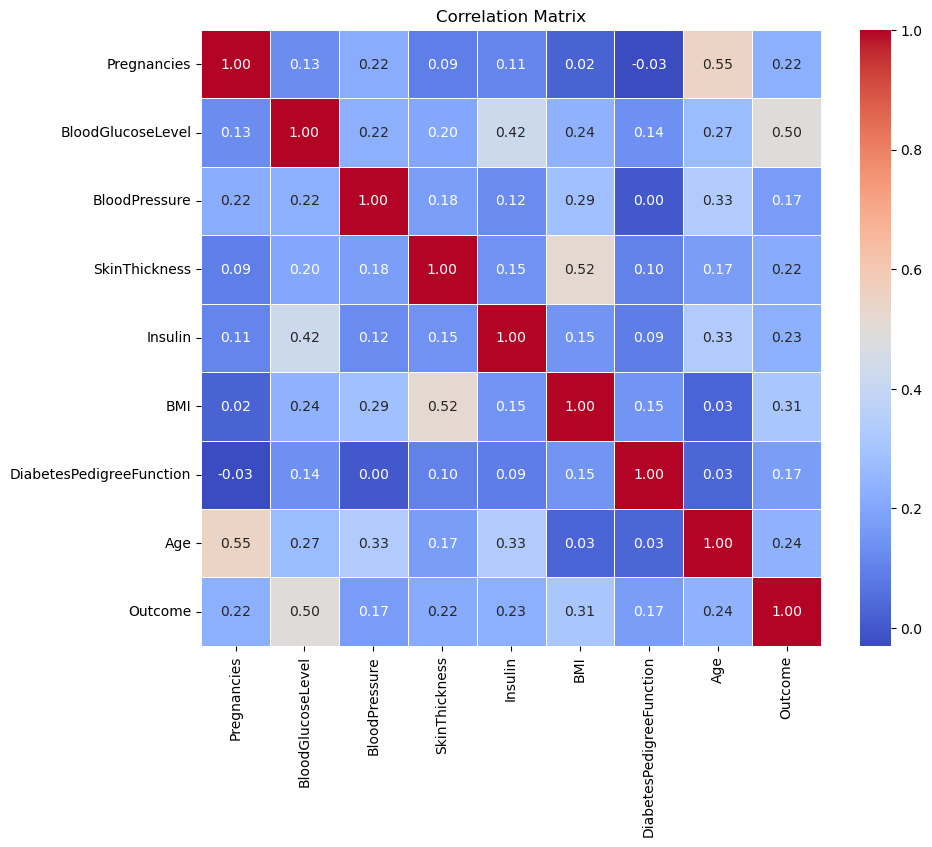

In [13]:
# Drop non-numeric columns (if any)
numeric_columns = copied_df1.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

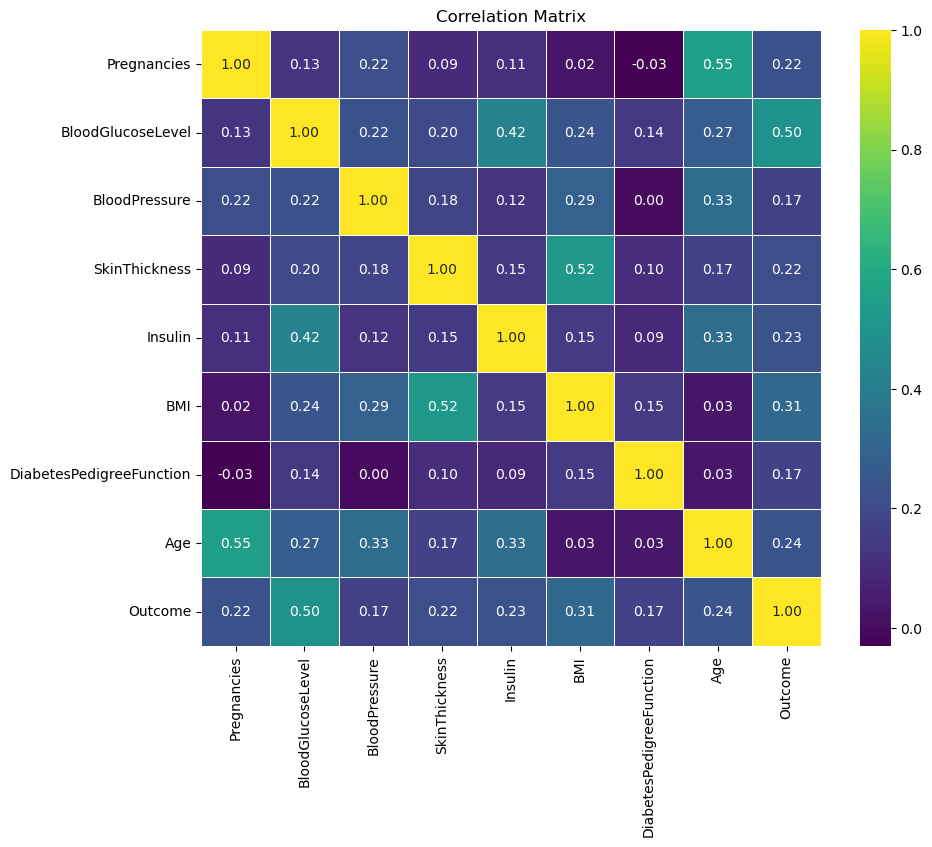

In [14]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix with a different color map ('viridis')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# AGE PIE CHART 

Age_Group
Young Adults         488
Early Middle-Aged    147
Late Middle-Aged     101
Seniors               32
Name: count, dtype: int64


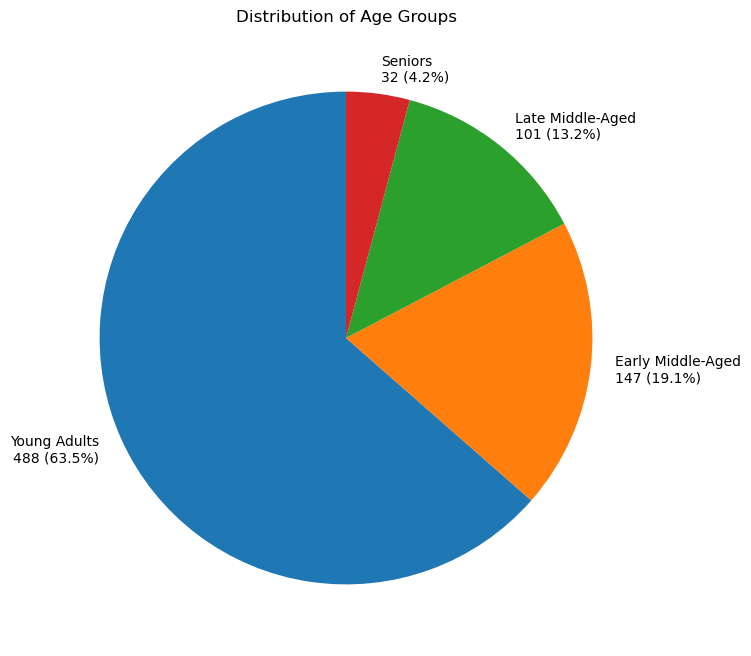

In [15]:
# Calculate the distribution of age groups
# This line counts the occurrences of each unique value in the 'Age_Group' column of the DataFrame `my_df`. 
# It returns a Pandas Series where the index represents unique age groups, and the values represent the count of each age group.
age_group_count = my_df['Age_Group'].value_counts()
print(age_group_count)

# Calculate count and percentage separately
counts_age_group = age_group_count.values
# This extracts the counts from the Pandas Series and assigns them to the variable `counts_age_group`.  

percentages_age_group = (counts_age_group / counts_age_group.sum()) * 100
# This calculates the percentage of each count relative to the total count. 
# It creates a new array `percentages_age_group` containing the percentages.
 
#Young adults:488/768:0.635*100:63.5%
#Seniors: 32/768:0.04166*100:4.1666%


# Create a pie chart with count and percentage below NEEDS COMMENTS
plt.figure(figsize=(8, 8))
plt.pie(counts_age_group, labels=[f'{s}\n{c} ({p:.1f}%)' 
for s, c, p in zip(age_group_count.index, counts_age_group, percentages_age_group)], startangle=90)
plt.title('Distribution of Age Groups')
plt.show()


BMI_Category
Obese            477
Overweight       185
Normal Weight    102
Underweight        4
Name: count, dtype: int64


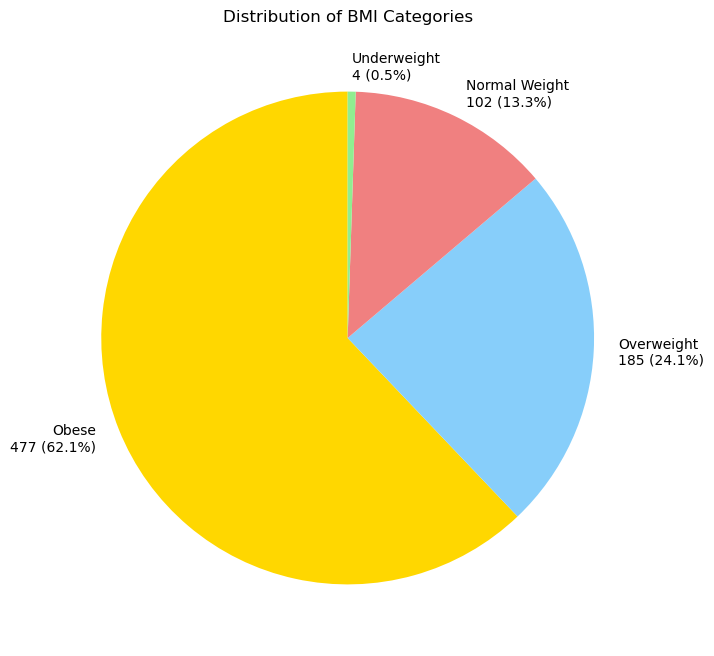

In [17]:
# Calculate the distribution of BMI categories
bmi_group_count = my_df['BMI_Category'].value_counts()
print(bmi_group_count)

# Calculate count and percentage separately
counts_bmi_group = bmi_group_count.values
percentages_bmi_group = (counts_bmi_group / counts_bmi_group.sum()) * 100

# Define colors for the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'orange']

# Create a pie chart with count and percentage below
plt.figure(figsize=(8, 8))
plt.pie(counts_bmi_group, labels=[f'{s}\n{c} ({p:.1f}%)'
                for s, c, p in zip(bmi_group_count.index, counts_bmi_group, percentages_bmi_group)], 
                colors=colors, startangle=90)
plt.title('Distribution of BMI Categories')
plt.show()


# Histograms

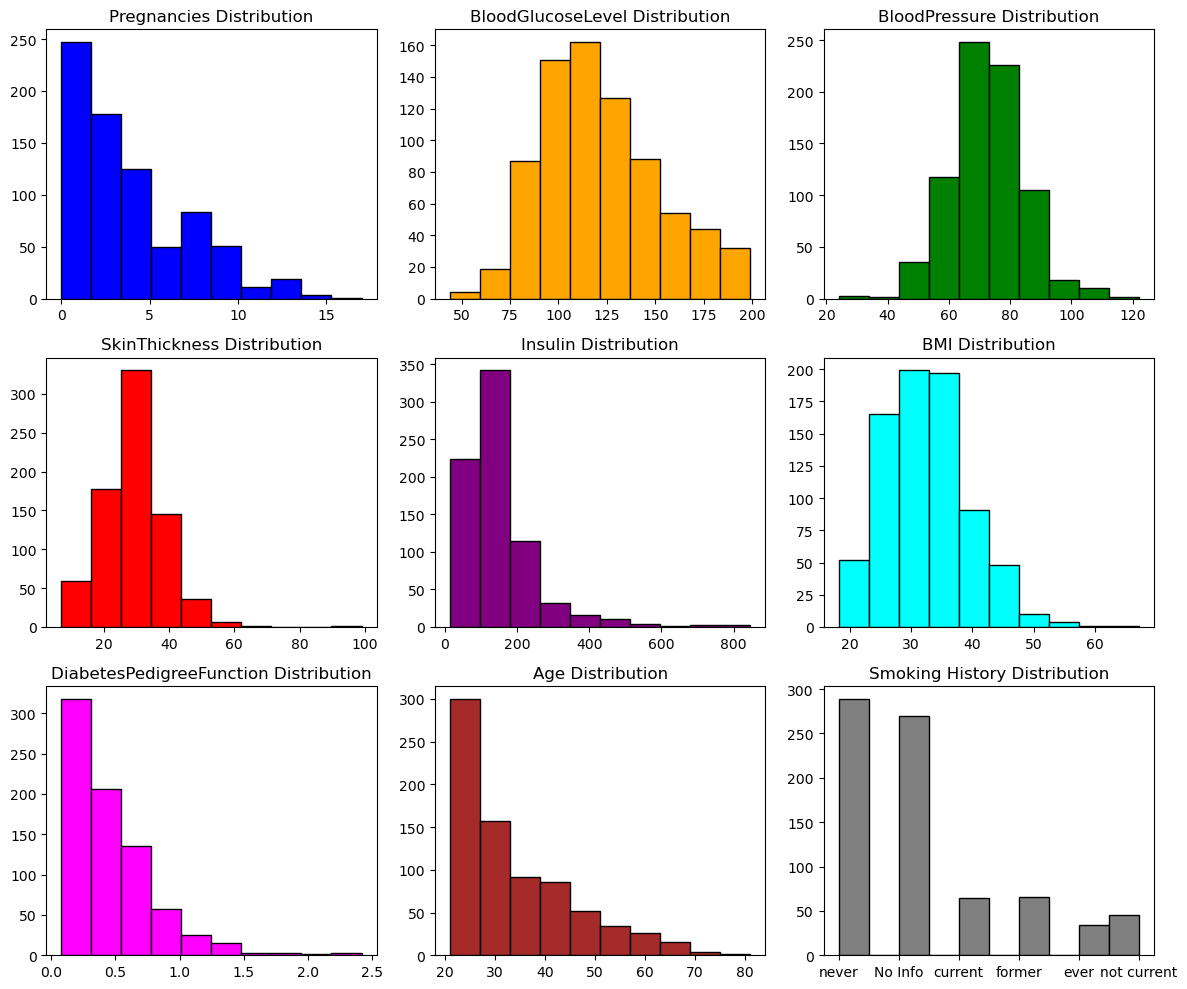

In [18]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(12, 10))

# Histogram for Pregnancies with color 'blue'
plt.subplot(3, 3, 1)
plt.hist(my_df['Pregnancies'], color='blue', edgecolor='black')
plt.title('Pregnancies Distribution')

# Histogram for BloodGlucoseLevel with color 'orange'
plt.subplot(3, 3, 2)
plt.hist(my_df['BloodGlucoseLevel'], color='orange', edgecolor='black')
plt.title('BloodGlucoseLevel Distribution')

# Histogram for BloodPressure with color 'green'
plt.subplot(3, 3, 3)
plt.hist(my_df['BloodPressure'], color='green', edgecolor='black')
plt.title('BloodPressure Distribution')

# Histogram for SkinThickness with color 'red'
plt.subplot(3, 3, 4)
plt.hist(my_df['SkinThickness'], color='red', edgecolor='black')
plt.title('SkinThickness Distribution')

# Histogram for Insulin with color 'purple'
plt.subplot(3, 3, 5)
plt.hist(my_df['Insulin'], color='purple', edgecolor='black')
plt.title('Insulin Distribution')

# Histogram for BMI with color 'cyan'
plt.subplot(3, 3, 6)
plt.hist(my_df['BMI'], color='cyan', edgecolor='black')
plt.title('BMI Distribution')

# Histogram for DiabetesPedigreeFunction with color 'magenta'
plt.subplot(3, 3, 7)
plt.hist(my_df['DiabetesPedigreeFunction'], color='magenta', edgecolor='black')
plt.title('DiabetesPedigreeFunction Distribution')

# Histogram for Age with color 'brown'
plt.subplot(3, 3, 8)
plt.hist(my_df['Age'], color='brown', edgecolor='black')
plt.title('Age Distribution')

# Histogram for Smoking History with color 'gray'
plt.subplot(3, 3, 9)
plt.hist(my_df['smoking_history'], color='gray', edgecolor='black')
plt.title('Smoking History Distribution')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


# Creation of Barplot for Smoking History

In [22]:
my_df


,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,smoking_history,Outcome,Age_Group,BloodPressure_Category,BMI_Category,Smoking_Status
0,6,148.0,72.0,35.0,105.5,33.6,0.627,50,never,1,Late Middle-Aged,Normal,Obese,non-smoking
1,1,85.0,66.0,29.0,183.5,26.6,0.351,31,No Info,0,Young Adults,Normal,Overweight,No-info
2,8,183.0,64.0,28.5,93.5,23.3,0.672,32,never,1,Young Adults,Normal,Normal Weight,non-smoking
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,current,0,Young Adults,Normal,Overweight,smoking
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,current,1,Young Adults,Normal,Obese,smoking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,former,0,Seniors,Normal,Obese,smoking
764,2,122.0,70.0,27.0,115.5,36.8,0.340,27,never,0,Young Adults,Normal,Obese,non-smoking
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,ever,0,Young Adults,Normal,Overweight,smoking
766,1,126.0,60.0,23.0,114.0,30.1,0.349,47,never,1,Late Middle-Aged,Normal,Obese,non-smoking


People who smoke are prone to Diabetes taking insulin compared to non-smokers

In [23]:
my_df.head(50)

,Pregnancies,BloodGlucoseLevel,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,smoking_history,Outcome,Age_Group,BloodPressure_Category,BMI_Category,Smoking_Status
0,6,148.0,72.0,35.0,105.5,33.6,0.627,50,never,1,Late Middle-Aged,Normal,Obese,non-smoking
1,1,85.0,66.0,29.0,183.5,26.6,0.351,31,No Info,0,Young Adults,Normal,Overweight,No-info
2,8,183.0,64.0,28.5,93.5,23.3,0.672,32,never,1,Young Adults,Normal,Normal Weight,non-smoking
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,current,0,Young Adults,Normal,Overweight,smoking
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,current,1,Young Adults,Normal,Obese,smoking
5,5,116.0,74.0,29.0,145.5,25.6,0.201,30,never,0,Young Adults,Normal,Overweight,non-smoking
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,never,1,Young Adults,Normal,Obese,non-smoking
7,1,115.0,75.0,35.5,192.5,35.3,0.134,29,No Info,0,Young Adults,Normal,Obese,No-info
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,never,1,Late Middle-Aged,Normal,Obese,non-smoking
9,8,125.0,96.0,26.5,183.0,35.2,0.232,54,never,1,Late Middle-Aged,Hypertensive,Obese,non-smoking


# Creation of ScatterPlots

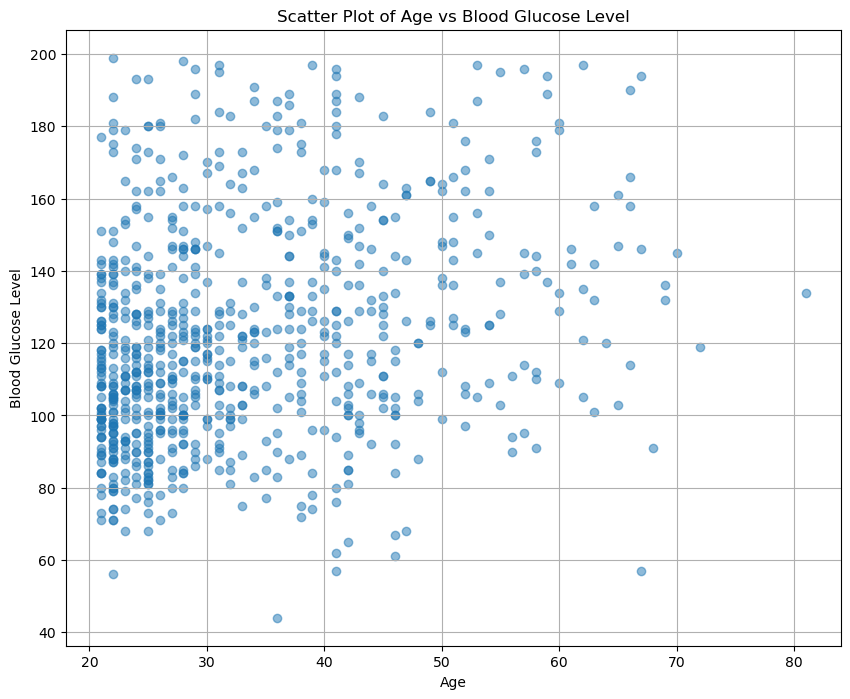

In [32]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8)) 
# Create a scatter plot with Age on x-axis and Blood Glucose Level on y-axis
plt.title('Scatter Plot of Age vs Blood Glucose Level')  

# Set the title of the plot
plt.scatter(my_df['Age'], my_df['BloodGlucoseLevel'], alpha=0.5) 

# Label the x-axis as 'Age'
plt.xlabel('Age') 

# Label the y-axis as 'Blood Glucose Level'
plt.ylabel('Blood Glucose Level')  

# Show a grid in the plot
plt.grid(True)  

# Display the plot
plt.show()  

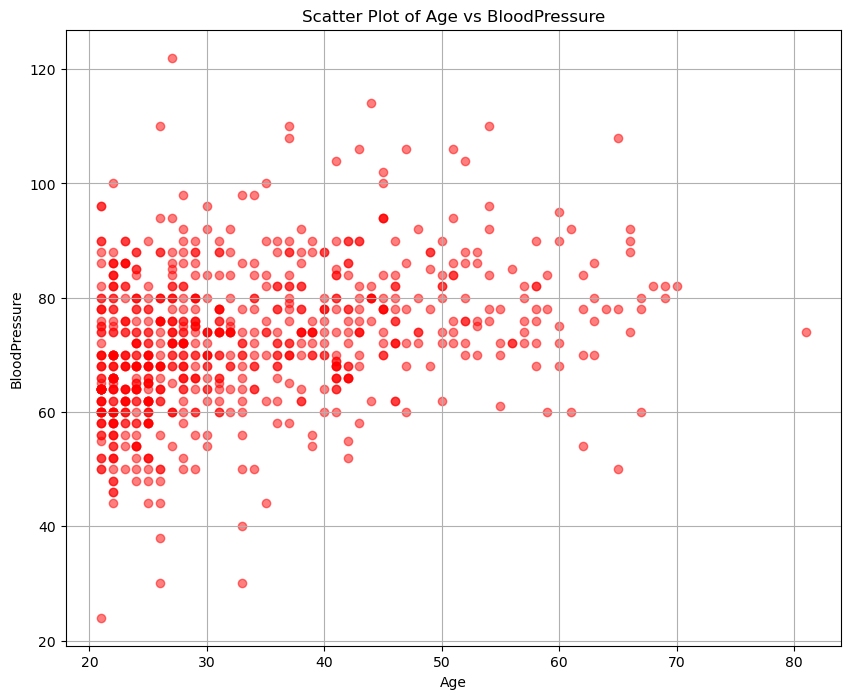

In [25]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8)) 
# Create a scatter plot with Age on x-axis and BloodPressure on y-axis
plt.title('Scatter Plot of Age vs BloodPressure')  

# Set the title of the plot
plt.scatter(my_df['Age'], my_df['BloodPressure'], alpha=0.5, color='red') 

# Label the x-axis as 'Age'
plt.xlabel('Age') 

# Label the y-axis as 'BloodPressure'
plt.ylabel('BloodPressure')  

# Show a grid in the plot
plt.grid(True)  

# Display the plot
plt.show() 

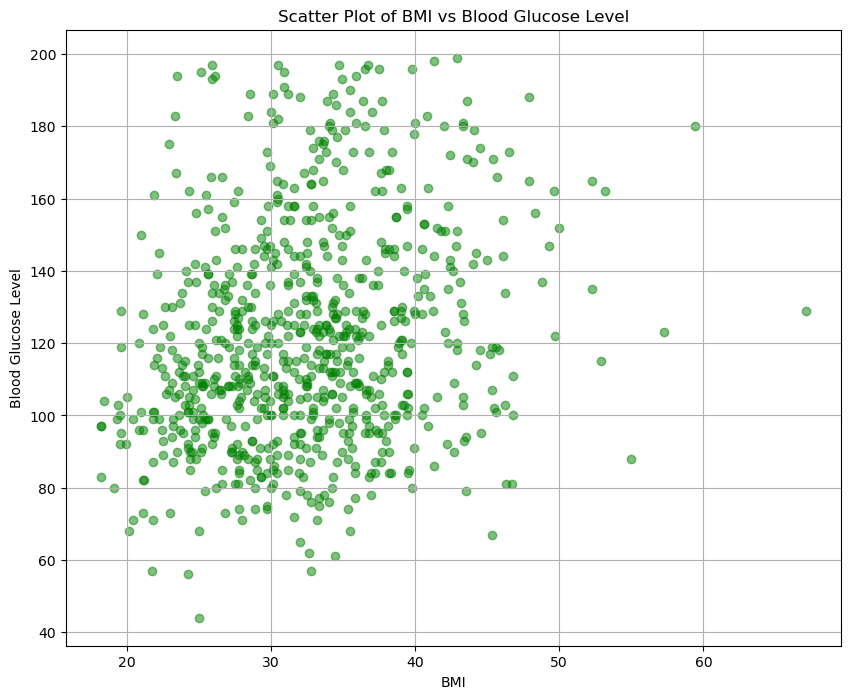

In [33]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8)) 
# Create a scatter plot with BMI on x-axis and Blood Glucose Level on y-axis
plt.title('Scatter Plot of BMI vs Blood Glucose Level')  

# Set the title of the plot
plt.scatter(my_df['BMI'], my_df['BloodGlucoseLevel'], alpha=0.5, color = 'green') 

# Label the x-axis as 'BMI'
plt.xlabel('BMI') 

# Label the y-axis as 'Blood Glucose Level'
plt.ylabel('Blood Glucose Level')  

# Show a grid in the plot
plt.grid(True)  

# Display the plot
plt.show()  


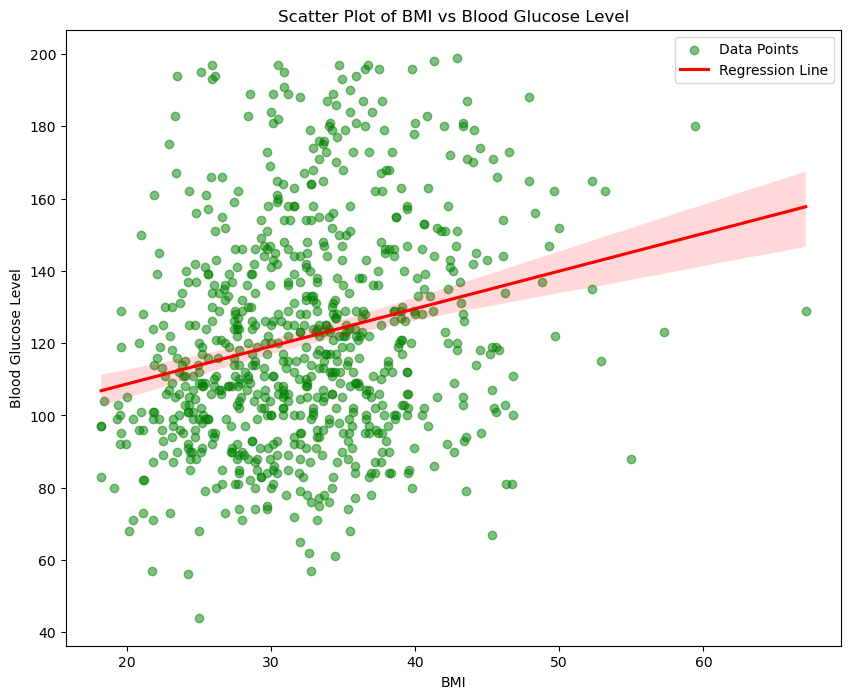

In [27]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8))

# Create a scatter plot with BMI on x-axis and Blood Glucose Level on y-axis
plt.scatter(my_df['BMI'], my_df['BloodGlucoseLevel'], alpha=0.5, color='green', label='Data Points')

# Fit a linear regression line to the scatter plot
sns.regplot(x='BMI', y='BloodGlucoseLevel', data=my_df, scatter=False, color='red', label='Regression Line')

# Set the title of the plot
plt.title('Scatter Plot of BMI vs Blood Glucose Level')

# Label the x-axis as 'BMI'
plt.xlabel('BMI')

# Label the y-axis as 'Blood Glucose Level'
plt.ylabel('Blood Glucose Level')

# Show a legend
plt.legend()

# Show the plot
plt.show()


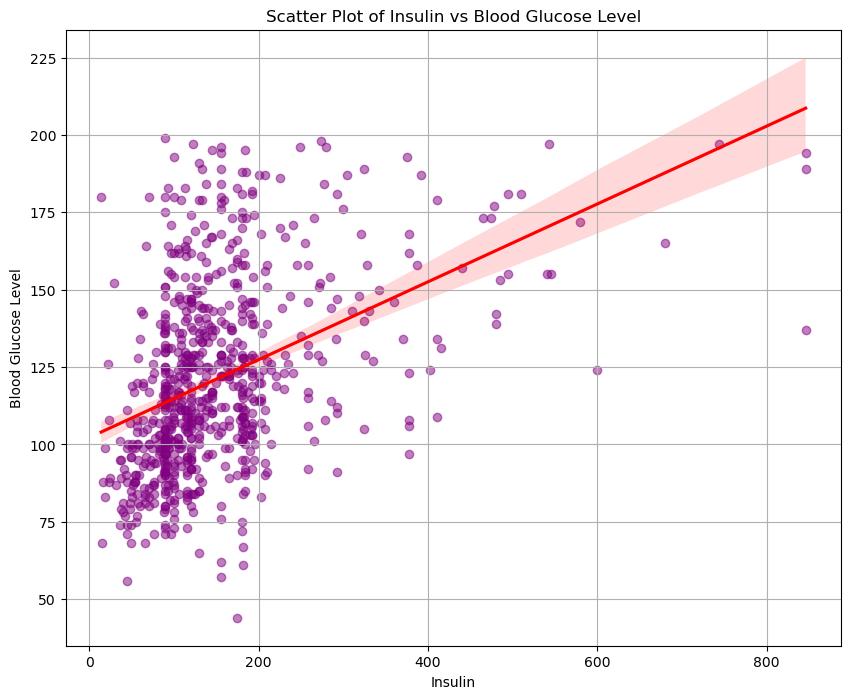

In [28]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8))

# Create a scatter plot with Insulin on x-axis and Blood Glucose Level on y-axis
plt.scatter(my_df['Insulin'], my_df['BloodGlucoseLevel'], alpha=0.5, color='purple')

# Fit a linear regression line to the scatter plot
sns.regplot(x='Insulin', y='BloodGlucoseLevel', data=my_df, scatter=False, color='red', label='Regression Line')

# Set the title of the plot
plt.title('Scatter Plot of Insulin vs Blood Glucose Level')

# Label the x-axis as 'Insulin'
plt.xlabel('Insulin')

# Label the y-axis as 'Blood Glucose Level'
plt.ylabel('Blood Glucose Level')

# Show a grid in the plot
plt.grid(True)

# Display the plot
plt.show()


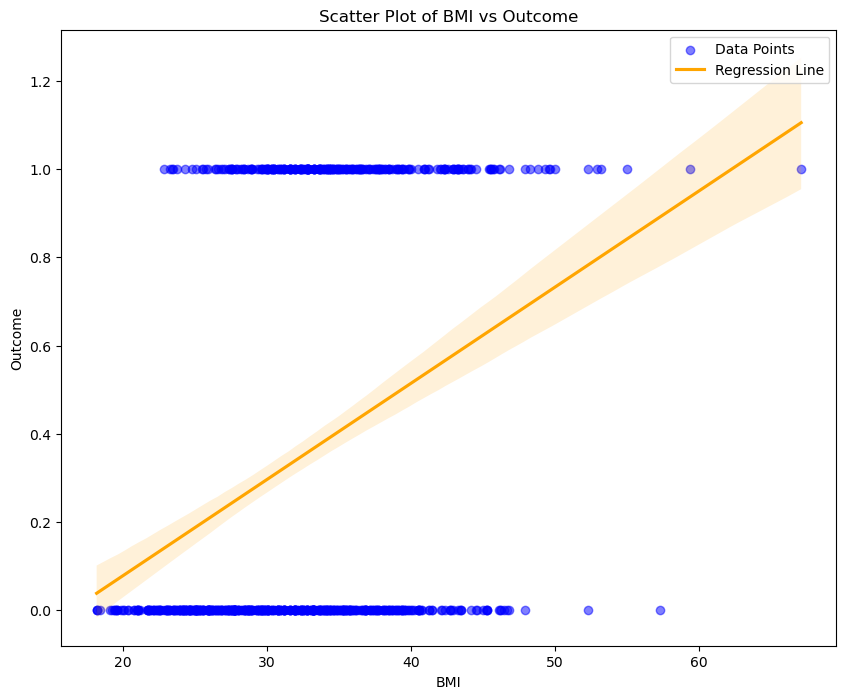

In [29]:
# Create a figure object with specified size (width, height)
plt.figure(figsize=(10, 8))

# Create a scatter plot with BMI on x-axis and Outcome on y-axis
plt.scatter(my_df['BMI'], my_df['Outcome'], alpha=0.5, color='blue', label='Data Points')

# Fit a linear regression line to the scatter plot
sns.regplot(x='BMI', y='Outcome', data=my_df, scatter=False, color='orange', label='Regression Line')

# Set the title of the plot
plt.title('Scatter Plot of BMI vs Outcome')

# Label the x-axis as 'BMI'
plt.xlabel('BMI')

# Label the y-axis as 'Outcome'
plt.ylabel('Outcome')

# Show a legend
plt.legend()

# Show the plot
plt.show()

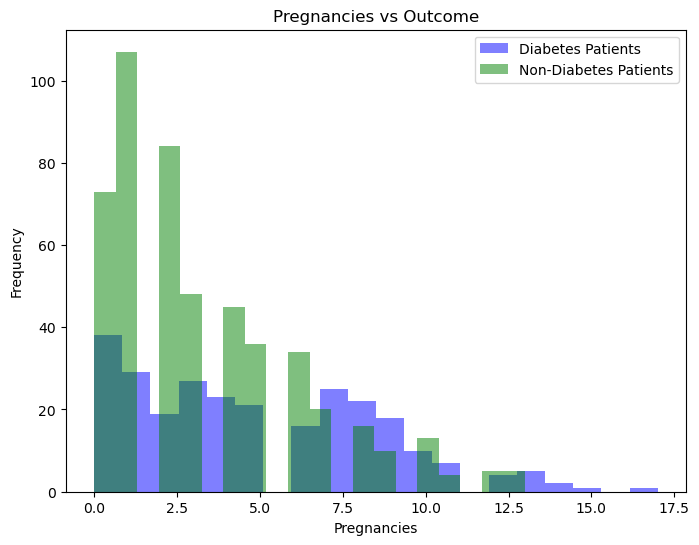

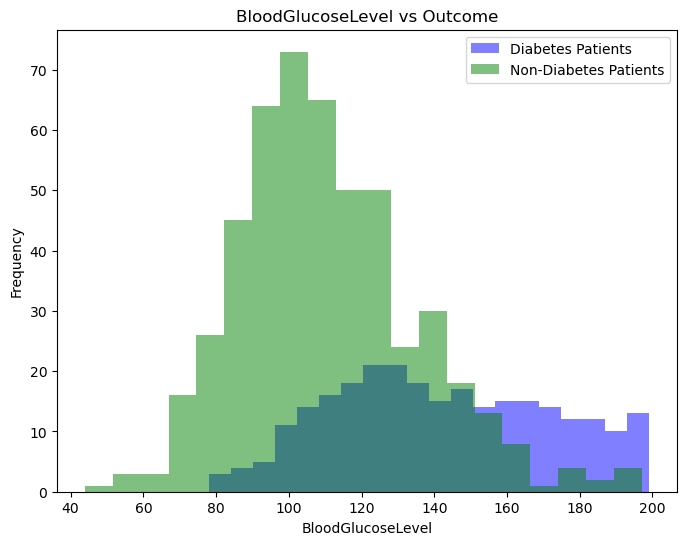

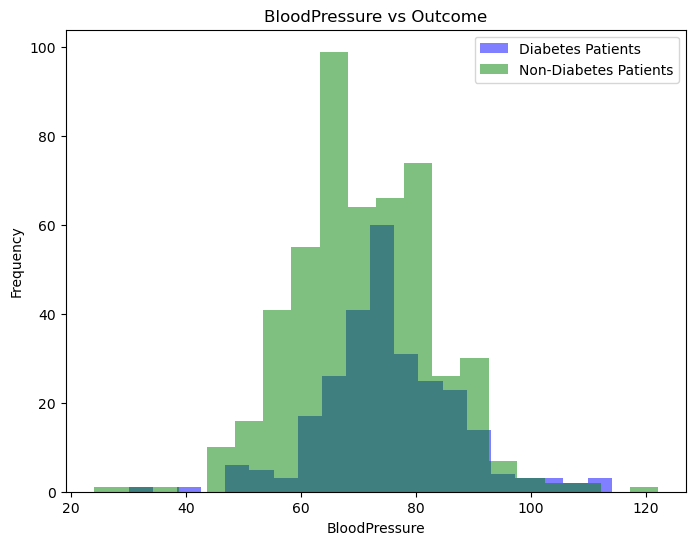

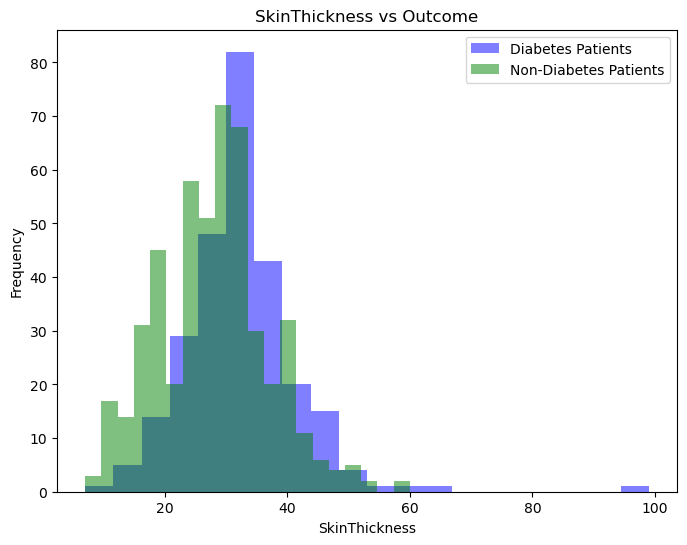

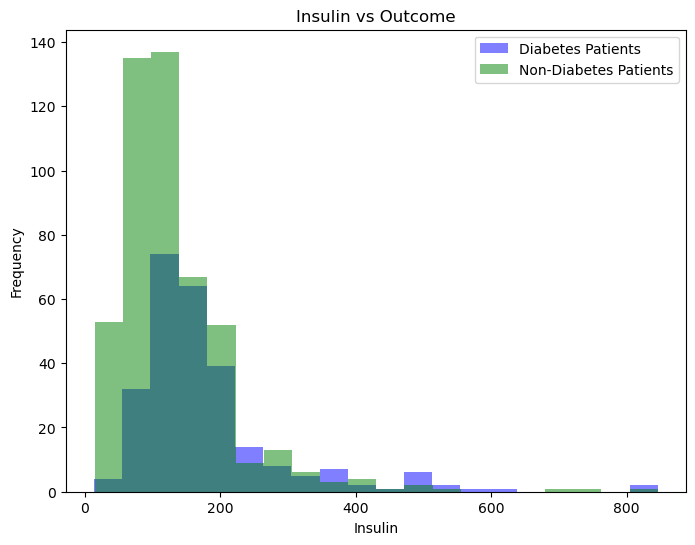

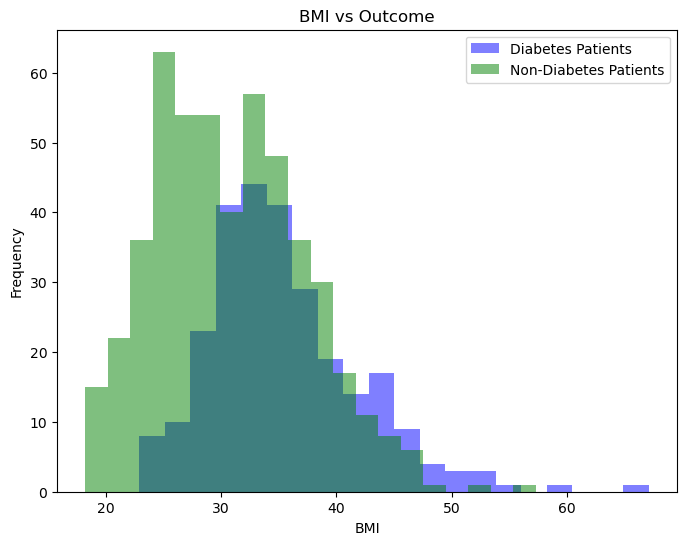

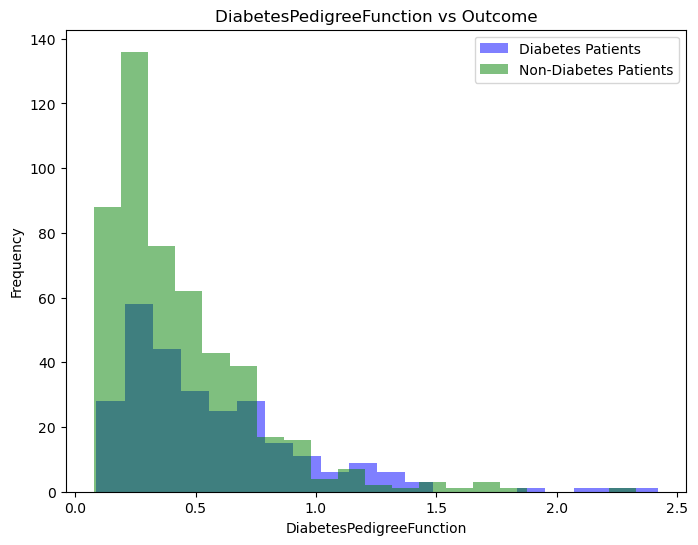

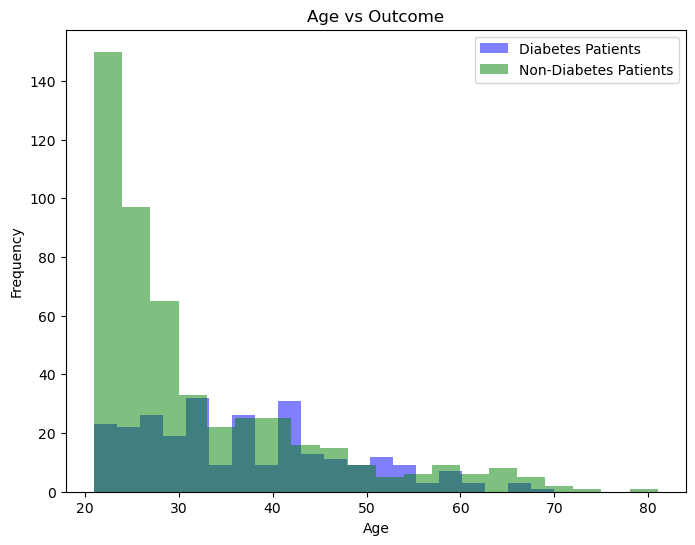

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate data based on outcome
diabetes_patients = my_df[my_df['Outcome'] == 1]
non_diabetes_patients = my_df[my_df['Outcome'] == 0]

# List of columns to plot
columns_to_plot = ['Pregnancies', 'BloodGlucoseLevel', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create histograms for each variable based on Outcome
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(diabetes_patients[column], bins=20, alpha=0.5, label='Diabetes Patients', color='blue')
    plt.hist(non_diabetes_patients[column], bins=20, alpha=0.5, label='Non-Diabetes Patients', color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} vs Outcome')
    plt.legend()
    plt.show()

# Smoking History

In [19]:
# my_df is the panda dataframe and we are calling the index of the column "smoking_history". 
# .unique is a pandas method that will return an array our unique values in the "smoking_history" column as seen below. 
my_df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [20]:
# we made smoking_categories the variable and assigned a list of the possible choices for people who smoke or used to smoke
smoking_categories = ['current', 'former', 'ever', 'not current', 'No Info']

# "smoking_status" is a new column coming from "smoking_history" and used lambda function to determine each element.
my_df['Smoking_Status'] = my_df['smoking_history'].apply(lambda x: 'smoking' if x in smoking_categories else 'non-smoking')
# lambda x is "smoking" and it takes x and determines if it's in the list "smoking_categories". 
# if not in "smoking_categories" x will be put in a new column called "non-smoking".

non_smokers_data = my_df[my_df['Smoking_Status']=='non-smoking']
#boolean values where "smoking_status" is true if it is equal to "non-smoking"

smokers_data = my_df[my_df['Smoking_Status']=='smoking']
#boolean values where "smoking_status" is true if it is equal to "smoking"


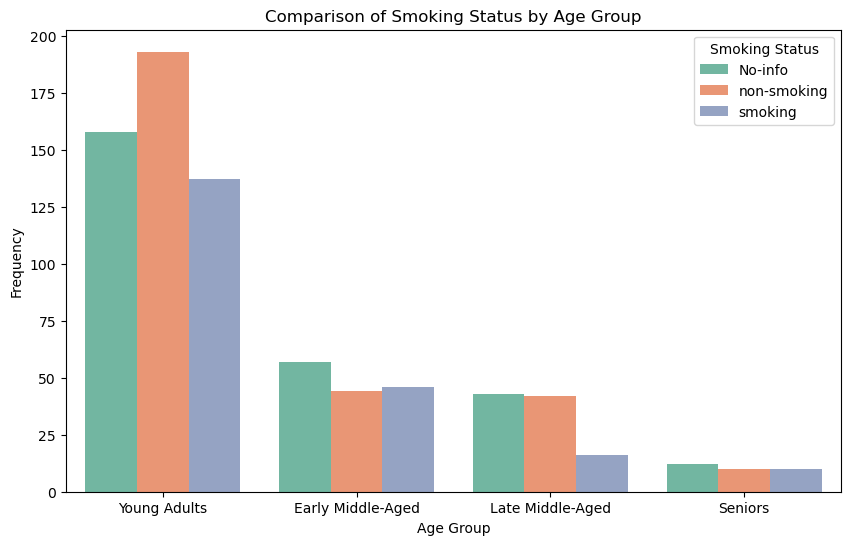

            Age_Group Smoking_Status  Frequency
0        Young Adults        No-info        158
1        Young Adults    non-smoking        193
2        Young Adults        smoking        137
3   Early Middle-Aged        No-info         57
4   Early Middle-Aged    non-smoking         44
5   Early Middle-Aged        smoking         46
6    Late Middle-Aged        No-info         43
7    Late Middle-Aged    non-smoking         42
8    Late Middle-Aged        smoking         16
9             Seniors        No-info         12
10            Seniors    non-smoking         10
11            Seniors        smoking         10


In [21]:
#Define a Function to Categorize Smoking Status:
# This line defines a function named `categorize_smoking_status` that takes a value as input.
 #  - `if value == 'No Info':`: If the value is 'No Info', the function returns 'No-info'.
 #  - `elif value == 'never':`: If the value is 'never', the function returns 'non-smoking'.
 #  - `else:`: If the value is neither 'No Info' nor 'never', the function returns 'smoking'

# "Value is the local variable parameter"
def categorize_smoking_status(value):
    if value == 'No Info':
        return 'No-info'
    elif value in smoking_categories:
        return 'smoking'
    else:
      return 'non-smoking'

my_df['Smoking_Status'] = my_df['smoking_history'].apply(categorize_smoking_status)
#Apply Categorization Function:**
  # - `my_df['Smoking_Status'] = my_df['smoking_history'].apply(categorize_smoking_status)`:
#This line applies the `categorize_smoking_status` function to the 'smoking_history' 
#column of the DataFrame `my_df` and creates a new column 'Smoking_Status' with the categorized values.

# Group data by 'Age_Group' and 'Smoking_Status'
grouped_data = my_df.groupby(['Age_Group', 'Smoking_Status']).size().reset_index(name='Frequency')

#This groups the data by 'Age_Group' and 'Smoking_Status' and calculates the size (frequency) of each group.
#.reset_index(name='Frequency')`: 
#This resets the index of the resulting grouped data and names the count column as 'Frequency'. 
#The result is a DataFrame with columns 'Age_Group', 'Smoking_Status', and 'Frequency'.

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Frequency', hue='Smoking_Status', data=grouped_data, palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Comparison of Smoking Status by Age Group')
plt.legend(title='Smoking Status')
plt.show()



print(grouped_data)

## Conclusion and Discussion

The project's primary goal revolves around predicting diabetes in patients through diagnostic measurements. Evaluation criteria encompass two critical aspects: assessing a small-scale program and analyzing publicly available data. In evaluating the small-scale program, functionality and code quality are central. The program's functionality is appraised based on its ability to meet proposed requirements, while code quality is assessed on cleanliness, organization, modular structure, use of functions, docstrings, comments, and overall code clarity. 

The analysis of publicly available data involves meticulous data handling, exploratory data analysis (EDA), and visualization techniques. Data handling includes addressing missing values, duplicates, and standardizing the data. EDA techniques aim to gain comprehensive insights through descriptive statistics, correlation analysis, and visual representations. Visualization tools such as histograms, heatmaps, and pie charts are utilized to effectively communicate findings. Balancing code quality with analytical rigor is pivotal to achieving success in this multifaceted project. By meeting the criteria for both the small-scale program and data analysis, the project aims to deliver an accurate diabetes prediction model while upholding high standards in code quality and analytical robustness.
